<div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект. 

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 

Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np#UPD


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# Ознакомимся с данными, просмотрев первые 10 строк
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой

	pd.set_option('display.max_columns', None)
</div>

In [5]:
data.info() #выведем основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
data.describe()#Применим к таблице data метод describe() и выведите на экран список характерных значений.

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [7]:
#и на наличие дубликатов:
print(data.duplicated().sum())
#  дубликатов не обнаружено

0


In [8]:
#Также проверим датасет на наличие пропусков
data.isna().sum()
# пропусков много и с пропусками в каждой категории придется работать отдельно

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
#Определим долю пропущенных значений, чтобы определить на что необходтио обратить большее внимание, в ходе предобработки 
for column in data.columns:
    emptyRecords=len(data.loc[data[column].isnull()])
    if emptyRecords>0:
        print('- {} - содержит {} пропусков ({:.1%} от всех)'.format(column, emptyRecords, emptyRecords/data.shape[0]))

- ceiling_height - содержит 9195 пропусков (38.8% от всех)
- floors_total - содержит 86 пропусков (0.4% от всех)
- living_area - содержит 1903 пропусков (8.0% от всех)
- is_apartment - содержит 20924 пропусков (88.3% от всех)
- kitchen_area - содержит 2278 пропусков (9.6% от всех)
- balcony - содержит 11519 пропусков (48.6% от всех)
- locality_name - содержит 49 пропусков (0.2% от всех)
- airports_nearest - содержит 5542 пропусков (23.4% от всех)
- cityCenters_nearest - содержит 5519 пропусков (23.3% от всех)
- parks_around3000 - содержит 5518 пропусков (23.3% от всех)
- parks_nearest - содержит 15620 пропусков (65.9% от всех)
- ponds_around3000 - содержит 5518 пропусков (23.3% от всех)
- ponds_nearest - содержит 14589 пропусков (61.6% от всех)
- days_exposition - содержит 3181 пропусков (13.4% от всех)


#### Исходные данные датасета представляют собой таблицы,  в которойсодержащую 23699 записей и 22 категории. В качестве разделителя в csv файле используется знак табуляции (\t), вместо обычныз точки с запятой. Первичный анализ показывает, что таблица содержит множество пустых значенений, изучение и предобработка которых будет осуществлена на следующих этапах выполнения проекта. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Рекомендую создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Здесь необходимо написать короткий вывод о проблемах с данными (пропуски, дубликаты, неверный тип данных, странные значения и т.д.)
</div>

#### UPD
Всего в файле с данными - 23 699 строк.
Полностью заполнены данными столбцы total_images, last_price, total_area, rooms, floor, studio, open_plan. Таким образом в данных столбцах отсутствуют пропуски данных.
В столбцах floors_total и locality_name заполнены данными более 99% строк, т.о. пропуски далее можно будет удалить в связи с малочисленностью.
В столбце balcony (балконы) пропусков - 11 519, скорее всего это означает что в квартире нет балкона и пропуски можно заменить на 0.
В столбцах таблицы соблюдается корректность типов данных.
У некоторых числовых полей есть тип данных float (например, ceiling_height) - т.к. в столбцах есть пропуски (NaN) и pandas такие столбцы автоматически назначает float, с ними можно выполнять математические операции, например вычислить среднее значение.
В некоторых столбцах тип данных - int64 (например, rooms), который не нужно преобразовывать.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

### Предобработка данных

In [10]:
#Разберемся с балконами, где они  есть, а где их на самом деле нет, а еще будем их считать целыми, а не плавающими значениями
data['balcony'] = data['balcony'].fillna(0).astype(int)
#print(data['balcony'].value_counts())

In [11]:
# Удалим 86 строк, в которых не заполнено количество этажей.
data = data.dropna(subset=['floors_total'])

In [12]:
#  в столбце days_exposition  обнаружен 3 181 пропуск, который мы заменим медианным значением
#upd data.loc[data['days_exposition'].isnull(), 'days_exposition'] = data['days_exposition'].median()


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Если тут пропуск, то значит квартира не продана. Эти пропуски заполнять не нужно
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

In [13]:
# преобразуем столбец к целочисленному типу данных (int).
data['floors_total'] = data['floors_total'].astype(int)
#print(data['floors_total'].value_counts())


In [14]:
# займемся столбцом с наибольшим числом   пропусков  - 'is_apartment'. Заменим  пропуски на False
data['is_apartment'] = data['is_apartment'].fillna(False)
#print(data['is_apartment'].value_counts())

In [15]:

#Пропуски в столбце "ceiling_height" заменим на медианные значения высоты потолков по каждому этажу. Для этого  запустим цикл, который будет перебирать уникальные значения столбца 'floors_total' и в случае пропуска в столбце 'ceiling_height', заменит на медианное значение высоты потолков по каждому этажу

median_replace = data.groupby('floors_total')['ceiling_height'].median()
for total in data['floors_total'].unique():
    data.loc[(data['floors_total'] == total) & (data['ceiling_height'].isna()), 'ceiling_height'] = median_replace[total]


#print(data['ceiling_height'].unique())



<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Хороший способ)
</div>

In [16]:
presorted_local_name = set(data['locality_name'].unique()) #уникальные значения
#в алфавитном порядке для столбца "locality_name"
print(data.locality_name.unique()) #кол-во значений в столбце
print(presorted_local_name)


['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [17]:
data.locality_name = data.locality_name.str.replace(
    'ё', 'е') #замена буквы "ё" на "е"
data.locality_name = data.locality_name.str.replace(
    'поселок городского типа', 'поселок') #замена на однотипные значнеия
data.locality_name = data.locality_name.str.replace(
    'городской поселок', 'поселок') #замена на однотипные значнеия

edit_locality_name = set(data['locality_name'].unique()) #уникальные значения
#в алфавитном порядке
print(len(edit_locality_name)) #кол-во уникальных значений после удаления дубликатов

#print(edit_locality_name)

323


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

In [18]:
#Заполняем пропуски в столбце parks_nearest
#parks_nearest_edit=data.loc[~data['parks_nearest'].isnull()]
#parks_nearest_grouped=parks_nearest_edit.pivot_table(index='locality_name', 
                                                      #values='parks_nearest', aggfunc='median')

In [19]:
#def set_parks_nearest(row):
    #if pd.isnull(row['parks_nearest']):
        #if row['parks_around3000']==0:
            #return 0
        #for index in parks_nearest_grouped.index:
            #if row['locality_name']==index:
                #return parks_nearest_grouped.loc[index,'parks_nearest']
        #return 'Ошибка'
    #return row['parks_nearest']
#data['parks_nearest']=data.apply(set_parks_nearest,axis=1)

In [20]:
#Заполняем пропуски в столбце ponds_nearest
#ponds_nearest_parse=data.loc[~data['ponds_nearest'].isnull()]
#ponds_nearest_grouped=ponds_nearest_parse.pivot_table(index='locality_name', 
                                                      #values='ponds_nearest', aggfunc='median')


In [21]:
#UPD def set_ponds_nearest(row):
    #if pd.isnull(row['ponds_nearest']):
        #if row['ponds_around3000']==0:
            #return 0
        #for index in ponds_nearest_grouped.index:
            #if row['locality_name']==index:
                #return ponds_nearest_grouped.loc[index,'ponds_nearest']
        #return 'Ошибка'
    #return row['ponds_nearest']
#data['ponds_nearest']=data.apply(set_ponds_nearest,axis=1)

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Пропуски в столбцах с картографическими данными лучше не трогать. Заполняя их таким образом, ты проставляешь одинаковые расстояния до центра (парка, прудов, аэропорта) для разных квартир, хотя они могут быть расположены в разных частях города. Эти пропуски заполнять не нужно
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

In [22]:
#Заменинм пропущенные значения в колонке 'kitchen_area' медианным значением
median_replace_kitchen = data.groupby('rooms')['kitchen_area'].median()
for total in data['rooms'].unique():
    data.loc[(data['rooms'] == total) & (data['kitchen_area'].isna()), 'kitchen_area'] = median_replace_kitchen[total]
# print(data['kitchen_area'].value_counts())

# Исключим 193 строки с записью "  Nan", как вероятные ошибки данных.
data.loc[data['kitchen_area'] == '  nan','kitchen_area'] = None
data = data.dropna(subset=['kitchen_area'])
# print(data['kitchen_area'].unique())

In [23]:
# Затем удалим строки с высотой потолков более 10 м(коих выдает 26), как вероятные ошибки данных
data.loc[data['ceiling_height'] > 10,'ceiling_height'] = None
data = data.dropna(subset=['ceiling_height'])
#print(data['ceiling_height'][data['ceiling_height'] > 10].count())

In [24]:
# удалим квартиры с высотой потолка менее 2м., (их оказалось - 3).
print(data['ceiling_height'][data['ceiling_height'] < 2].count())
data.loc[data['ceiling_height'] < 2,'ceiling_height'] = None
data = data.dropna(subset=['ceiling_height'])
print(data['ceiling_height'][data['ceiling_height'] < 2].count()) # проверка после удаления

3
0


In [25]:
# исключим пропуски в столбце "locality_name"
data = data.dropna(subset=['locality_name'])

In [26]:
 #Приводим в целочисленный тип количество парков  и прудов вокруг. Заменяем пропущенные значения на 0
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)
data['parks_nearest'] = data['parks_around3000'].fillna(value=0).astype(int)
data['ponds_nearest'] = data['ponds_around3000'].fillna(value=0).astype(int)

In [27]:
#Пропуски в столбце "living_area" заменим на медианы значений жилой площади по каждому значению кол-ва комнат столбца "rooms". Для этого напишем цикл, перебирающий уникальные значения столбца 'rooms' и в случае пропуска в столбце 'living_area', заменит на медианное значение жилой площади по данному количеству комнат

median_replace_rooms = data.groupby('rooms')['living_area'].median()
for total in data['rooms'].unique():
    data.loc[(data['rooms'] == total) & (data['living_area'].isna()), 'living_area'] = median_replace_rooms[total]

In [28]:
#Немного улучштм вид отображения даты публикации объявления, т.к. данные все равно округлены до целых дней, часы и минуты отбросим
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
#print(data['first_day_exposition'].head())


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23342 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23342 non-null  int64         
 1   last_price            23342 non-null  float64       
 2   total_area            23342 non-null  float64       
 3   first_day_exposition  23342 non-null  datetime64[ns]
 4   rooms                 23342 non-null  int64         
 5   ceiling_height        23342 non-null  float64       
 6   floors_total          23342 non-null  int64         
 7   living_area           23342 non-null  float64       
 8   floor                 23342 non-null  int64         
 9   is_apartment          23342 non-null  bool          
 10  studio                23342 non-null  bool          
 11  open_plan             23342 non-null  bool          
 12  kitchen_area          23342 non-null  float64       
 13  balcony         

In [30]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5438
cityCenters_nearest     5415
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3151
dtype: int64

In [31]:
sorted_local_name = set(data['rooms'].unique()) #уникальные значения
#в алфавитном порядке для столбца "locality_name"
print(data.rooms.unique()) #кол-во значений в столбце
print(sorted_local_name)



[ 3  1  2  4  5  6  7 11  8 14 10 15  9 19 16 12]
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19}


#### Вывод
В первоначальном файле было 23 699 строк, в результате обработки и удаления вероятных ошибок данных осталось в датасете 23 345 строк, по которым заполнены все строки во всех значимых столбцах. В процессе обработки данных произведено следующее:

В столбце 'balcony' пропуски были заменены на 0, также столбец преобразован к целочисленному типу данных.
Пропуски в столбце 'ceiling_height' заменили на медианы значений высот потолков по каждому этажу, а также удалили аномальные значения выше 10 метров и ниже 2 метров.
Пропуски в столбце  'kitchen_area' заменили  медианным значением площади кухни по каждому значению количества комнат столбца 'room'.
Пропуски в столбце 'living_area' заменили на медианы значений жилой площади по каждому значению количества комнат столбца 'room'.
В столбце 'is_apartment' пропуски заменили на False.
Исключили пропуски в столбце 'locality_name', как вероятные ошибки.
В столбцах 'ponds_nearest' и 'ponds_nearest' пропуски заменили медианными значениями по каждому значению столбца 'locality_name'
В столбце days_exposition отбросим часы и минуты  данные все равно округлены до целых дней.
Неявные ошибки в столбце 'locality_name' удалили путем приведения к единому стандарту записей букв (замена "ё" на "е") и статуса ПГТ у населенных пунктов.
Необходимые для дальнейших рассчетов значения были преведены к целочисленному формату
Значения в столбце('days_exposition и столбцах с картографическими данными ('airports_nearest','cityCenters_nearest','ponds_nearest','parks_nearest')  не были подвергнуты обработке, во избежании искажений данных.



<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай ещё изучим аномалии в других столбцах. Аномальное значение не значит, что оно нереальное или не может существовать. Это значит, что такое значение выделяется на общем фоне и встретить его большая редкость. Посмотри какие значения есть в столбцах со стоимостью квартиры, количеством комнат и общей площадью. Кажется, в них есть значения, которые сильно выделяются на общем фоне (слишком высокие). Не забудь проверить какое количество данных мы в итоге отбрасываем. Это количество не должно превышать 10% от изначального объёма данных. C этим может помочь следующий код

	new_data.shape[0] / old_data.shape[0]
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b> 
<br>Правка не выполнена. Давай разберём на примере общей площади (график ниже). На графике чётко видно, что после 200м квартир практически нет, а после 300 линии даже не видно. В данном случае аномальными значениями можно считать все квартиры больше 200-300м. Значит эти значения нужно отбросить.
</div>


In [32]:
#UPD3 Функция для подсчёта границ с учетом 3 размаха 
def quartile_range(df, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    dfq = data.loc[(data[column] < q3 + 3*iqr) & (data[column] > q1 - 3*iqr), column]
    return dfq
#UPD2 Столбцы с выбросами
list_features = ['last_price', 'total_area']
for col in list_features:
    data[col] = quartile_range(data, col)

In [33]:
#UPD3 Функция для подсчёта границ с учетом 1 размаха отдельно для количества комнат
def quartile_range(df, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    dfq = data.loc[(data[column] < q3 + 0.5*iqr) & (data[column] > q1 - 0.5*iqr), column]
    return dfq
#UPD3 Столбцы с выбросами
list_features = ['rooms']
for col in list_features:
    data[col] = quartile_range(data, col)

#UPD3 Возвращаем в целочисленный тип число комнат
data['rooms'] = data['rooms'].fillna(0).astype(int)

#UPD2 Изучаем, есть ли выбивающиеся значения
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23342.000000,2.236300e+04,22875.000000,23342.000000,23342.000000,23342.000000,23342.000000,23342.000000,23342.000000,23342.000000,17904.000000,17927.000000,23342.000000,23342.000000,23342.000000,23342.000000,20191.000000
mean,9.895382,5.280518e+06,57.167953,1.760003,2.708214,10.623040,34.455753,5.854683,10.455407,0.589067,28827.113438,14197.218832,0.471296,0.471296,0.590181,0.590181,181.421772
std,5.681146,2.898575e+06,23.648969,0.906624,0.245119,6.560447,21.765919,4.846962,5.668013,0.958733,12628.444118,8630.388062,0.749856,0.749856,0.883944,0.883944,220.160168
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.500000,2.000000,7.300000,0.000000,18582.000000,9236.000000,0.000000,0.000000,0.000000,0.000000,45.000000
50%,9.000000,4.550000e+06,51.600000,2.000000,2.650000,9.000000,30.500000,4.000000,9.000000,0.000000,26770.000000,13090.000000,0.000000,0.000000,0.000000,0.000000,96.000000
75%,14.000000,6.400000e+06,68.000000,2.000000,2.750000,16.000000,42.800000,8.000000,11.500000,1.000000,37294.000000,16285.000000,1.000000,1.000000,1.000000,1.000000,232.000000
max,50.000000,1.683000e+07,159.300000,3.000000,8.300000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3.000000,3.000000,3.000000,1580.000000


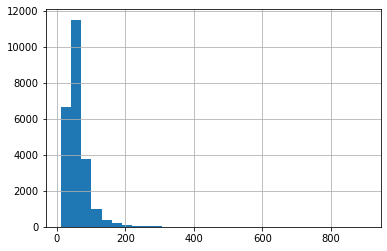

In [34]:
#код ревьюера
data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data2['total_area']).hist(bins=30);

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v3:</b> 
<br>В итоге ты отбросил почти 25% от всех данных, а доступимо отбросить не более 10%. Уменьши количество отбрасываемых данных в функции. 
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v4:</b>
<br>Отлично! Теперь всё верно)
</div>

In [35]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23342 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23342 non-null  int64         
 1   last_price            22363 non-null  float64       
 2   total_area            22875 non-null  float64       
 3   first_day_exposition  23342 non-null  datetime64[ns]
 4   rooms                 23342 non-null  int64         
 5   ceiling_height        23342 non-null  float64       
 6   floors_total          23342 non-null  int64         
 7   living_area           23342 non-null  float64       
 8   floor                 23342 non-null  int64         
 9   is_apartment          23342 non-null  bool          
 10  studio                23342 non-null  bool          
 11  open_plan             23342 non-null  bool          
 12  kitchen_area          23342 non-null  float64       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

In [36]:
#Добавим цены квадратного метра
data['price_per_meter'] = data['last_price'] / data['total_area']
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,1,2,2,NaN,120370.370370
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0,0,0,0,81.0,82920.792079
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,1,2,2,558.0,92785.714286
3,0,NaN,159.00,2015-07-24,3,2.60,14,45.00,9,False,False,False,9.50,0,Санкт-Петербург,28098.0,6800.0,2,2,3,3,424.0,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,2,1,1,121.0,100000.000000
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,поселок Янино-1,NaN,NaN,0,0,0,0,55.0,95065.789474
6,6,3700000.0,37.30,2017-11-02,1,2.66,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0,0,0,0,155.0,99195.710456
7,5,7915000.0,71.60,2019-04-18,2,2.75,24,30.50,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,0,0,0,NaN,110544.692737
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.81,0,поселок Мурино,NaN,NaN,0,0,0,0,189.0,87454.764777
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,0,0,0,289.0,88524.590164


In [37]:
#Функция метки дня недели
def weekday_type(row):
    if row['weekday']==0:
        return 'понедельник'
    if row['weekday']==1:
        return 'вторник'
    if row['weekday']==2:
        return 'среда'
    if row['weekday']==3:
        return 'четверг'
    if row['weekday']==4:
        return 'пятница'
    if row['weekday']==5:
        return 'суббота'
    if row['weekday']==6:
        return 'воскресенье'
    return "Ошибка"

In [38]:
#Функция метки для месяца
def month_type(row):
    if row['month']==1:
        return "Январь"
    if row['month']==2:
        return "Февраль"
    if row['month']==3:
        return "Март"
    if row['month']==4:
        return "Апрель"
    if row['month']==5:
        return "Май"
    if row['month']==6:
        return "Июнь"
    if row['month']==7:
        return "Июль"
    if row['month']==8:
        return "Август"
    if row['month']==9:
        return "Сентябрь"
    if row['month']==10:
        return "Октябрь"
    if row['month']==11:
        return "Ноябрь"
    if row['month']==12:
        return "Декабрь"
    return 'Ошибка'

In [39]:
#день недели публикации объявления;
data['weekday']=data['first_day_exposition'].dt.weekday
data['weekday_name']=data.apply(weekday_type, axis=1)
#месяц публикации объявления
data['month']=data['first_day_exposition'].dt.month
data['month_name']=data.apply(month_type, axis=1)
#Год публикации объявления
data['year']=data['first_day_exposition'].dt.year

In [40]:
#Добавим этаж квартиры; варианты — первый, последний, другой
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_id'] = data.apply(floor, axis=1)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,weekday_name,month,month_name,year,floor_id
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,1,2,2,NaN,120370.370370,3,четверг,3,Март,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0,0,0,0,81.0,82920.792079,1,вторник,12,Декабрь,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,1,2,2,558.0,92785.714286,3,четверг,8,Август,2015,другой
3,0,NaN,159.00,2015-07-24,3,2.60,14,45.00,9,False,False,False,9.50,0,Санкт-Петербург,28098.0,6800.0,2,2,3,3,424.0,NaN,4,пятница,7,Июль,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,2,1,1,121.0,100000.000000,1,вторник,6,Июнь,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,поселок Янино-1,NaN,NaN,0,0,0,0,55.0,95065.789474,0,понедельник,9,Сентябрь,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.66,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0,0,0,0,155.0,99195.710456,3,четверг,11,Ноябрь,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,2.75,24,30.50,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,0,0,0,NaN,110544.692737,3,четверг,4,Апрель,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.81,0,поселок Мурино,NaN,NaN,0,0,0,0,189.0,87454.764777,2,среда,5,Май,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,0,0,0,289.0,88524.590164,6,воскресенье,2,Февраль,2017,другой


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23342 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23342 non-null  int64         
 1   last_price            22363 non-null  float64       
 2   total_area            22875 non-null  float64       
 3   first_day_exposition  23342 non-null  datetime64[ns]
 4   rooms                 23342 non-null  int64         
 5   ceiling_height        23342 non-null  float64       
 6   floors_total          23342 non-null  int64         
 7   living_area           23342 non-null  float64       
 8   floor                 23342 non-null  int64         
 9   is_apartment          23342 non-null  bool          
 10  studio                23342 non-null  bool          
 11  open_plan             23342 non-null  bool          
 12  kitchen_area          23342 non-null  float64       
 13  balcony         

In [42]:
data['cityCenters_distance'] = (data['cityCenters_nearest']/1000).dropna().astype(int)
#data.head(10)

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Удаляя тут пропуски, ты теряешь данные в других столбцах. Делать этого не нужно. Можно изменить тип данных без замены пропусков следующим образом
    
    import numpy as np
    df['col'] = np.floor(pd.to_numeric(df['col'], errors='coerce')).astype('Int64')
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23342 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23342 non-null  int64         
 1   last_price            22363 non-null  float64       
 2   total_area            22875 non-null  float64       
 3   first_day_exposition  23342 non-null  datetime64[ns]
 4   rooms                 23342 non-null  int64         
 5   ceiling_height        23342 non-null  float64       
 6   floors_total          23342 non-null  int64         
 7   living_area           23342 non-null  float64       
 8   floor                 23342 non-null  int64         
 9   is_apartment          23342 non-null  bool          
 10  studio                23342 non-null  bool          
 11  open_plan             23342 non-null  bool          
 12  kitchen_area          23342 non-null  float64       
 13  balcony         

#### В данном разделе рассчитаны и добавлены в исходную таблицу следующие столбцы:


цена квадратного метра;
день недели, месяц и год публикации объявления;
варианты этажности квартиры — первый, последний, другой;
соотношение жилой и общей площади;
расстояние до центра города в метрах.

### Проведите исследовательский анализ данных


#### Параметры объектов:

#общая площадь count    22875.000000
mean        57.167953
std         23.648969
min         12.000000
25%         40.000000
50%         51.600000
75%         68.000000
max        159.300000
Name: total_area, dtype: float64


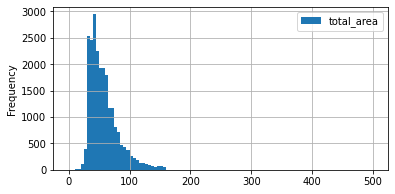

In [44]:
#общая площадь
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (6,3), range = (0,500))
print('#общая площадь',
        data['total_area'].describe())

#жилая площадь count    23342.000000
mean        34.455753
std         21.765919
min          2.000000
25%         18.500000
50%         30.500000
75%         42.800000
max        409.700000
Name: living_area, dtype: float64


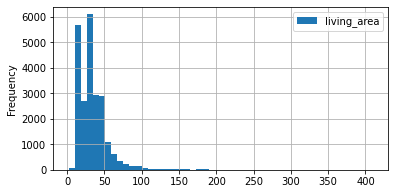

In [45]:
#жилая площадь*
data.plot(y = 'living_area', kind = 'hist', bins = 50, grid=True, figsize = (6,3), range = (2,410))
print('#жилая площадь',
        data['living_area'].describe())

#площадь кухни count    23342.000000
mean        10.455407
std          5.668013
min          1.300000
25%          7.300000
50%          9.000000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64


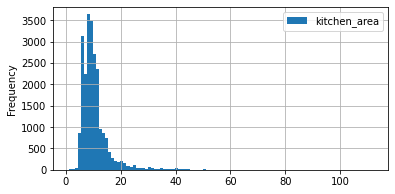

In [46]:
#площадь кухни*
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (6,3), range = (1,112))
print('#площадь кухни',
        data['kitchen_area'].describe())

#цена count    2.236300e+04
mean     5.280518e+06
std      2.898575e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.550000e+06
75%      6.400000e+06
max      1.683000e+07
Name: last_price, dtype: float64


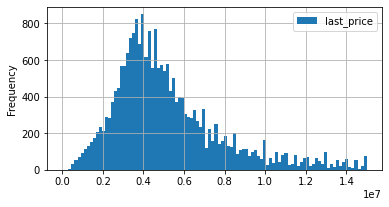

In [47]:
#цена
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (6,3))
print('#цена',
        data['last_price'].describe())

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

#число комнат count    23342.000000
mean         1.760003
std          0.906624
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: rooms, dtype: float64


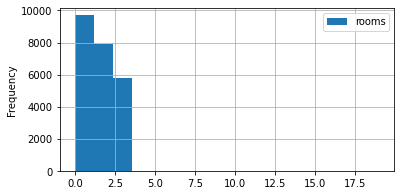

In [48]:
#количество комнат
data.plot(y = 'rooms', kind = 'hist',range=(0,19), bins = 16, grid=True, figsize = (6,3))
print('#число комнат',
       data['rooms'].describe())



#высота потолков count    23342.000000
mean         2.708214
std          0.245119
min          2.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          8.300000
Name: ceiling_height, dtype: float64


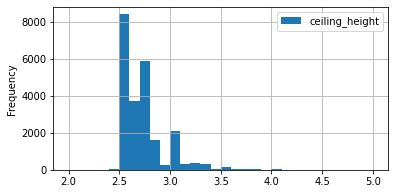

In [49]:
#высота потолков
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (6,3))
print('#высота потолков',
       data['ceiling_height'].describe())

#этаж квартиры count    23342.000000
mean         5.854683
std          4.846962
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


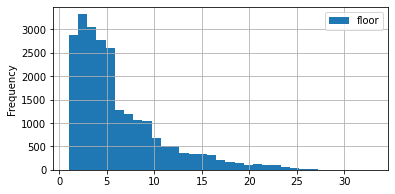

In [50]:
#этаж квартиры
data.plot(y = 'floor', kind = 'hist',range=(1,33), bins = 33, grid=True, figsize = (6,3))
print('#этаж квартиры',
       data['floor'].describe())

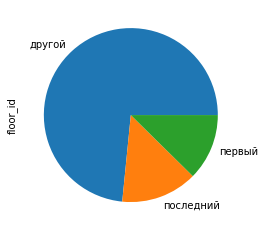

count      23342
unique         3
top       другой
freq       17138
Name: floor_id, dtype: object

In [51]:
#тип этажа квартиры
data['floor_id'].value_counts().plot(kind='pie')
plt.show()
data['floor_id'].describe()
    

#floors_total count    23342.000000
mean        10.623040
std          6.560447
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


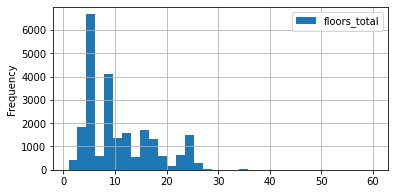

In [52]:
#общее количество этажей в доме*
data.plot(y = 'floors_total', kind = 'hist',range=(1,60), bins = 34, grid=True, figsize = (6,3))
print('#floors_total',
       data['floors_total'].describe())

#расстояние до центра города в метрах count    17927.000000
mean     14197.218832
std       8630.388062
min        181.000000
25%       9236.000000
50%      13090.000000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


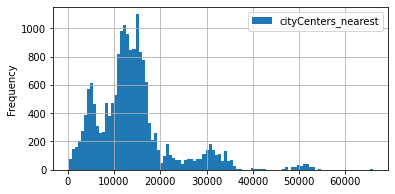

In [53]:
#расстояние до центра города в метрах*;
data.plot(y = 'cityCenters_nearest', kind = 'hist',range=(181,65968), bins = 100, grid=True, figsize = (6,3))
print('#расстояние до центра города в метрах',
       data['cityCenters_nearest'].describe())


#расстояние до ближайшего аэропорта count    17904.000000
mean     28827.113438
std      12628.444118
min          0.000000
25%      18582.000000
50%      26770.000000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64


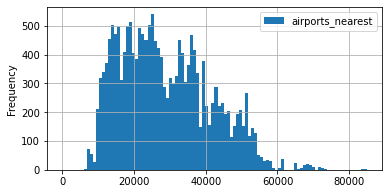

In [54]:
#расстояние до ближайшего аэропорта*
data.plot(y = 'airports_nearest', kind = 'hist',range=(0,84869), bins = 100, grid=True, figsize = (6,3))
print('#расстояние до ближайшего аэропорта',
       data['airports_nearest'].describe())


#расстояние до ближайшего парка count    23342.000000
mean         0.471296
std          0.749856
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_nearest, dtype: float64


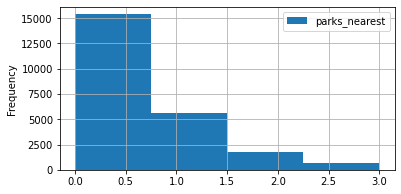

In [55]:
#расстояние до ближайшего парка*;
data.plot(y = 'parks_nearest', kind = 'hist',range=(0,3), bins = 4, grid=True, figsize = (6,3))
print('#расстояние до ближайшего парка',
       data['parks_nearest'].describe())


#день публикации объявления count    23342.000000
mean         2.566490
std          1.789466
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64


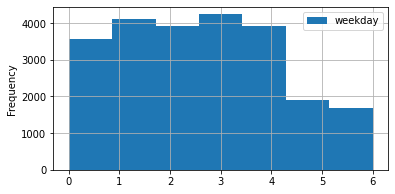

In [56]:
#день публикации объявления*
data.plot(y = 'weekday', kind = 'hist',range=(0,6), bins = 7, grid=True, figsize = (6,3))
print('#день публикации объявления',
       data['weekday'].describe())

#месяц публикации объявления count    23342.00000
mean         6.39641
std          3.49207
min          1.00000
25%          3.00000
50%          6.00000
75%         10.00000
max         12.00000
Name: month, dtype: float64


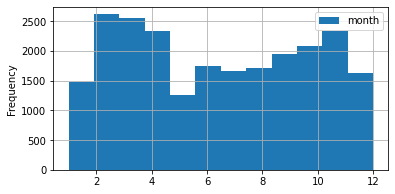

In [57]:

#месяц публикации объявления*
data.plot(y = 'month', kind = 'hist',range=(1,12), bins = 12, grid=True, figsize = (6,3))
print('#месяц публикации объявления',
       data['month'].describe())


#время продаж count    23342.000000
mean      2017.369591
std          1.039401
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year, dtype: float64


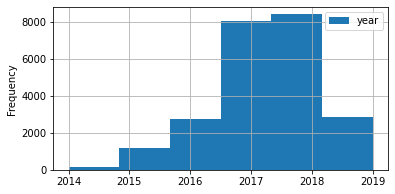

In [58]:
data.plot(y = 'year', kind = 'hist', bins = 6, grid=True, figsize = (6,3))
print('#время продаж',
        data['year'].describe())



##### Все графики напоминают собой распределение распределение Пуассона, кроме месяца публикации объявления и расстояния до ближайшего аэропорта.


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! 
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Для того чтобы подписать график мы можем использовать метод plt.title() и в конце кода применить plt.show(). По ссылкам ниже можно почитать подробнее как добавить название для графика или подписать его оси
    
    https://pyprog.pro/mpl/mpl_title.html
    https://pyprog.pro/mpl/mpl_axis_signatures.html 
</div>

#### Как быстро продавались квартиры:

#время продаж count    23342.000000
mean      2017.369591
std          1.039401
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year, dtype: float64


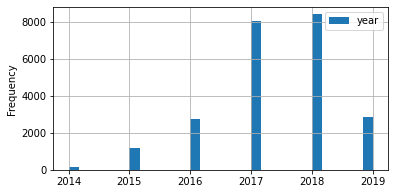

In [59]:
data.plot(y = 'year', kind = 'hist', bins = 30, grid=True, figsize = (6,3))
print('#время продаж',
       data['year'].describe())


count    20191.000000
mean       181.421772
std        220.160168
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
медиана 96.0
выбивающиеся значения 45.0      868
60.0      534
7.0       227
30.0      202
90.0      199
         ... 
969.0       1
1.0         1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1139, dtype: int64


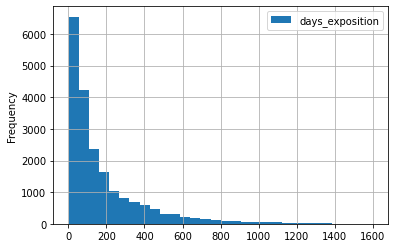

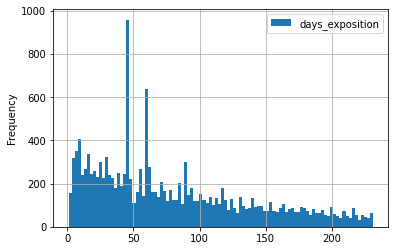

In [60]:
#диаграмма размаха
import matplotlib.pyplot as plt

data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,231))

print(data[data['days_exposition']!=0]['days_exposition'].describe()) #среднее значение + квартили
print('медиана',
        data[data['days_exposition']!=0]['days_exposition'].median()) #медиана
print('выбивающиеся значения',
        data[data['days_exposition']!=0]['days_exposition'].value_counts())

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>А как бы ты объяснил эти пики?
</div>

In [61]:
print(len(data.query('days_exposition > 500'))/len(data)*100)


7.4029646131436895


In [62]:
data = data[data['days_exposition'] < 500] #оставляем в датасете строки, где кол-во дней публикации <500
data = data.reset_index(drop=True) #обновляем индексы, чтобы они шли по порядку
data #проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,weekday_name,month,month_name,year,floor_id,cityCenters_distance
0,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,0,0,0,81.0,82920.792079,1,вторник,12,Декабрь,2018,первый,18.0
1,0,NaN,159.0,2015-07-24,3,2.60,14,45.0,9,False,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2,2,3,3,424.0,NaN,4,пятница,7,Июль,2015,другой,6.0
2,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,2,1,1,121.0,100000.000000,1,вторник,6,Июнь,2018,другой,8.0
3,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,поселок Янино-1,NaN,NaN,0,0,0,0,55.0,95065.789474,0,понедельник,9,Сентябрь,2018,другой,NaN
4,6,3700000.0,37.3,2017-11-02,1,2.66,26,10.6,6,False,False,False,14.4,1,поселок Парголово,52996.0,19143.0,0,0,0,0,155.0,99195.710456,3,четверг,11,Ноябрь,2017,другой,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18453,13,3550000.0,35.3,2018-02-28,1,2.86,15,16.3,4,False,False,False,9.1,2,Санкт-Петербург,17284.0,16081.0,1,1,2,2,29.0,100566.572238,2,среда,2,Февраль,2018,другой,16.0
18454,3,5500000.0,52.0,2018-07-19,2,2.55,5,31.0,2,False,False,False,6.0,0,Санкт-Петербург,20151.0,6263.0,1,1,0,0,15.0,105769.230769,3,четверг,7,Июль,2018,другой,6.0
18455,2,1350000.0,30.0,2017-07-07,1,2.55,5,17.5,4,False,False,False,6.0,0,Тихвин,NaN,NaN,0,0,0,0,413.0,45000.000000,4,пятница,7,Июль,2017,другой,NaN
18456,9,4600000.0,62.4,2016-08-05,3,2.60,9,40.0,8,False,False,False,8.0,0,Петергоф,45602.0,34104.0,1,1,1,1,239.0,73717.948718,4,пятница,8,Август,2016,другой,34.0


#### На данных графиках видно, что распределение равномерное, с редкими выбросами. 
Среднее значение равняется 122,61 дням(123 дня), а медиана равна 95 дням. 
Выявлены выбивающиеся значения и методом value_counts подтверждаем это - аномалии находятся на 45, 60, 7  и 30 днях. 
Данные аномалии связаны с тем, что сроки публикации на яндексе соответсвуют этим дням.
Аренда комнаты - 7 дней,Аренда квартиры: до 20 тыс/м — 7 дней, Аренда комнаты, участка или гаража - 30 дней Продажа квартиры: до 4,5 млн — 45 дней, Продажа комнаты - 45 дней, Аренда и продажа коммерческого объекта - 60 дней  от 4,5 до 10 млн — 60 дней, Аренда посуточная: Квартира, Комната, Дом / участок, Гараж - 60 дней.
Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
Публикации снятые в первый день - являются быстрыми, те, что держатся 500 дней и дольше - необычно долго. 
Можно убрать значения, где квартиры продаются  500 дней и дольше.


#### Какие факторы больше всего влияют на общую (полную) стоимость объекта:

                    mean  count     median
total_area                                
95.0        9.447956e+06     44  9649500.0
90.0        9.013709e+06     55  8600000.0
85.0        9.015031e+06     59  8600000.0
77.0        8.113826e+06     46  7500000.0
79.0        7.232397e+06     49  7200000.0
80.0        7.446512e+06    120  7150000.0
78.0        7.502286e+06     62  7025000.0
70.0        7.195402e+06    151  6900000.0
75.0        7.321029e+06     97  6800000.0
82.0        7.195946e+06     43  6650000.0
76.0        7.017311e+06     61  6525000.0
71.0        6.456929e+06     56  6500000.0
72.0        6.504848e+06    140  6472500.0
69.0        6.553879e+06     66  6375000.0
67.0        6.061513e+06     97  6300000.0
68.0        6.517791e+06     87  6200000.0
66.0        6.062397e+06     74  6200000.0
73.0        6.086378e+06     68  6000000.0
65.0        5.956619e+06    118  5892000.0
64.0        5.889592e+06    103  5850000.0
74.0        5.864112e+06     98  5675000.0
63.0       

0.7511520151820442

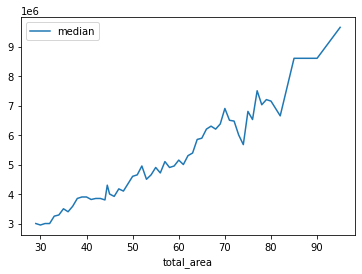

In [63]:
# Зависимость цены от общей площади
pivot_table_area = data.pivot_table(
    index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_area.columns = ['mean', 'count', 'median']
print(pivot_table_area.query(
    'count > 40').sort_values('median', ascending = False))
pivot_table_area.query(
    'count > 40').plot(y = 'median') #не включаем единичные случаи, чтобы картина была правдоподобнее


print(pivot_table_area)
data['total_area'].corr(data['last_price'])

#### Зависисмость между итоговой стоимостью и площадью помещения прослеживается . Чем больше площадь помещения, тем выше цена. Коэффицент Пирсона равен 0.751, что говорит о достаточно высокой корреляции между площадью и ценой. 


                     mean  count     median
living_area                                
55.0         8.886808e+06     47  9150000.0
53.0         8.581475e+06     59  8245000.0
56.0         8.191815e+06     54  7785000.0
63.6         8.102442e+06     58  7650000.0
52.0         7.707042e+06     52  7650000.0
...                   ...    ...        ...
15.5         3.515364e+06     55  3300000.0
15.2         3.379489e+06     47  3300000.0
17.0         3.359646e+06    558  3262500.0
17.3         3.267947e+06     54  3250000.0
17.2         3.218711e+06     72  3100000.0

[78 rows x 3 columns]
                  mean  count     median
living_area                             
2.0          6350000.0      1  6350000.0
3.0          4440000.0      1  4440000.0
5.4          6100000.0      1  6100000.0
6.0          3799000.0      1  3799000.0
6.5          4050000.0      1  4050000.0
...                ...    ...        ...
300.0              NaN      0        NaN
312.5              NaN      0       

0.6220767802614633

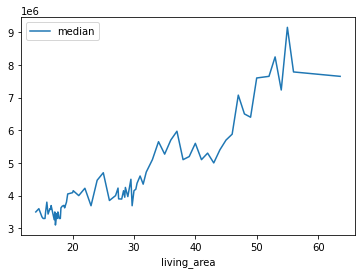

In [64]:
# Зависимость цены от жилой площади
pivot_table_area = data.pivot_table(
    index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_area.columns = ['mean', 'count', 'median']
print(pivot_table_area.query(
    'count > 40').sort_values('median', ascending = False))
pivot_table_area.query(
    'count > 40').plot(y = 'median') #не включаем единичные случаи, чтобы картина была правдоподобнее


print(pivot_table_area)
data['living_area'].corr(data['last_price'])


#### Зависисмость между итоговой стоимостью и  жилой площадью помещения. также прослеживается, но коэффицент Пирсона равен 0.622, что говорит о достаточно высокой корреляции между жилой площадью и ценой, но меньше чем с общей площадью.

                      mean  count     median
kitchen_area                                
20.00         9.270417e+06     84  8775000.0
15.10         9.108088e+06     47  8480000.0
17.00         8.712688e+06     82  8425000.0
16.00         8.233118e+06    127  7740000.0
11.05         8.029279e+06     67  7700000.0
...                    ...    ...        ...
5.30          3.311832e+06    113  3200000.0
5.00          3.268956e+06    274  3200000.0
5.70          3.275046e+06     65  3100000.0
5.40          3.121129e+06    101  3100000.0
5.50          3.115640e+06    314  3050000.0

[83 rows x 3 columns]
                      mean  count      median
kitchen_area                                 
2.00          2.821429e+06      7   2720000.0
2.30          2.940000e+06      1   2940000.0
2.40          2.200000e+06      1   2200000.0
2.89          5.967734e+06      1   5967734.0
3.00          2.735714e+06      7   3180000.0
...                    ...    ...         ...
93.00                  N

0.523129196395736

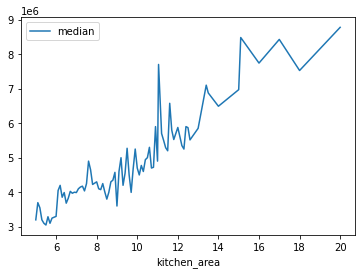

In [65]:
# Зависимость цены от площади кухни
pivot_table_area = data.pivot_table(
    index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_area.columns = ['mean', 'count', 'median']
print(pivot_table_area.query(
    'count > 40').sort_values('median', ascending = False))
pivot_table_area.query(
    'count > 40').plot(y = 'median') #не включаем единичные случаи, чтобы картина была правдоподобнее


print(pivot_table_area)
data['kitchen_area'].corr(data['last_price'])



<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Для изучения зависимости цены от площадей лучше подойдут scatter-plot'ы
</div>

####  Также можно отметить наличие зависимости меду ценой и площадью кухни, но она еще меньше , по сравнению с  общей площадью и жилой площадью  т.к. коэффицент Пирсона равен 0.523


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v2:</b> 
<br>Ты забыл в ячейке ниже поменять цену за квадратный метр на общую цену
</div>

               mean  count     median
rooms                                
0      8.607952e+06    819  8260000.0
3      6.548969e+06   4067  5900000.0
2      5.134199e+06   6279  4650000.0
1      3.733083e+06   6727  3550000.0
               mean  count     median
rooms                                
0      8.607952e+06    819  8260000.0
1      3.733083e+06   6727  3550000.0
2      5.134199e+06   6279  4650000.0
3      6.548969e+06   4067  5900000.0


0.22479620185061494

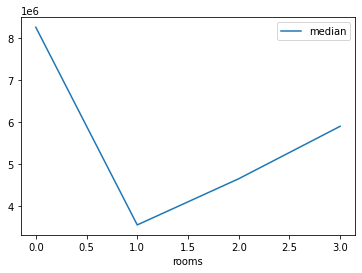

In [66]:
# Зависимость цены от числа комнат
pivot_table_area = data.pivot_table(
    index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_area.columns = ['mean', 'count', 'median']

print(pivot_table_area.query(
    'count > 30').sort_values('median', ascending = False))
pivot_table_area.query(
    'count > 30').plot(y = 'median') #не включаем единичные случаи, чтобы картина была правдоподобнее


print(pivot_table_area)
data['rooms'].corr(data['last_price'])

#### UPD2 На графике видно, что цена за квадратный метр незначительно увеличивается с увеличением числа комнат.  Наибольшая стоимость квдратного метра наблюдается у студий.Коэффицент Пирсона, равный 0,224 говорит о том, что прямой  зависимость между показателем цены за квадратный метр и числом комнат в квартире нет, но стоит отметить, что для полноты исследования не хватает данных по объектам с 4-мя и 5-ю комнатами, число которых меньше, чем объектов с 1,2 и 3-мя комнатами


                   mean  count     median
floor_id                                 
другой     5.294930e+06  13288  4600000.0
первый     4.132726e+06   2176  3750000.0
последний  4.811704e+06   2428  4100000.0
0.11195465554771239


,mean,count,median
floor,,,
1,4.132726e+06,2176,3750000.0
26,4.413500e+06,20,3920000.0
5,4.815573e+06,1945,4190000.0
2,4.964671e+06,2506,4210000.0
3,5.156169e+06,2304,4300000.0


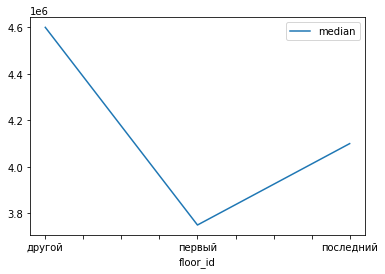

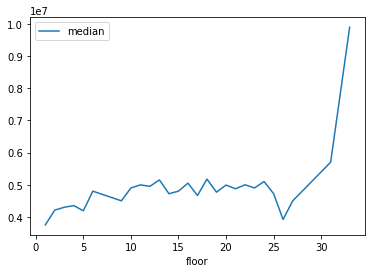

In [67]:
#зависимость цены от этажа квартиры
pivot_table_floor_id = data.pivot_table(
    index = 'floor_id', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_id.columns = ['mean', 'count', 'median'] #избавление от мультииндекса
pivot_table_floor_id.plot(y = 'median')
pivot_table_floor = data.pivot_table(
    index = 'floor', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor.columns = ['mean', 'count', 'median'] #избавление от мультииндекса
pivot_table_floor.plot(y = 'median') #график по медиане

print(pivot_table_floor_id)
print(data['floor'].corr(data['last_price'])) #кореляция
pivot_table_floor.sort_values(by='median').head() #поиск аномалий

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Тут тоже нужно изучить общую стоимость, а не цену за квадратный метр
</div>

#### UPD2 Корреляция между этажом и  общей ценой отсутствует, что доказывает коэффицент Пирсона, который равен 0,111, . Первый этаж является самым дешевым. С возрастанием этажа наблюдается рост цены,  плато которой наблюдается с 10 по 25 этаж но незначительный дороже первых, но обычно не намного. Дорогими являются другие этажи. Исключение составляют  этажи выще 26, но количество таких кейсов мало, поэтому нельзя утверждать о наличии четкой зависимости.




,mean,count,median
weekday,,,
1,5.127017e+06,3150,4470000.0
3,5.139538e+06,3233,4450000.0
5,4.997459e+06,1463,4450000.0
0,5.073522e+06,2680,4400000.0
2,5.093311e+06,2959,4400000.0
4,5.087213e+06,3112,4400000.0
6,4.986560e+06,1295,4350000.0


-0.009311904145396836

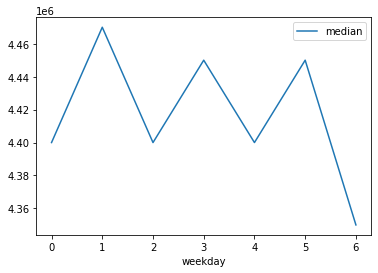

In [68]:
#зависимость цены от дня недели
pivot_table_weekday = data.pivot_table(
    index = 'weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday.columns = ['mean', 'count', 'median']
display(pivot_table_weekday.sort_values('median', ascending = False))
pivot_table_weekday.plot(y = 'median') #используем медиану чтобы избежать аномалий
data['weekday'].corr(data['last_price'])


#### UPD Можно утверждать, что взаимосвязи между днем недели и ценой объекта нет, но можно утверждать, что в воскресенье квартиры стоят дешевле

               mean  count     median
month                                
9      5.281465e+06   1629  4500000.0
11     5.184491e+06   1907  4500000.0
8      5.151310e+06   1450  4497000.0
4      5.128065e+06   1310  4490000.0
2      5.075548e+06   2035  4430000.0
1      5.078553e+06   1125  4400000.0
5      5.138651e+06    958  4400000.0
7      5.086813e+06   1386  4400000.0
10     5.035927e+06   1734  4400000.0
12     4.923438e+06   1228  4400000.0
3      5.035028e+06   1686  4350000.0
6      4.899282e+06   1444  4200000.0


0.0044019215629990905

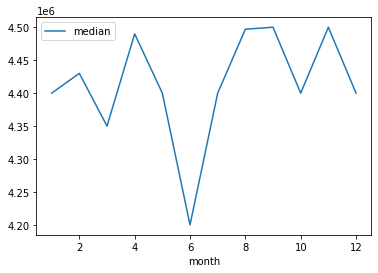

In [69]:
# Зависимость цены от месяца публикации
pivot_table_month =data.pivot_table(
    index = 'month', 
    values = 'last_price', 
    aggfunc = ['mean', 'count', 'median']) #используем колонку _id чтобы не выдавало ошибку
pivot_table_month.columns = ['mean', 'count', 'median']
print(pivot_table_month.sort_values('median', ascending = False))
pivot_table_month.plot(y = 'median') 
data['month'].corr(data['last_price'])

#### Зависимости между месяцами и ценой объекта также не выявлена, но можно утверждать, что в июне квартиры стоимость квартир находится на минимальной отметке(сезон отпусков) .


              mean  count     median
year                                
2019  5.263272e+06   1049  4700000.0
2015  5.233059e+06    420  4550000.0
2018  5.025219e+06   7278  4432500.0
2017  5.096593e+06   7179  4380000.0
2016  5.164610e+06   1966  4350000.0


<AxesSubplot:xlabel='year'>

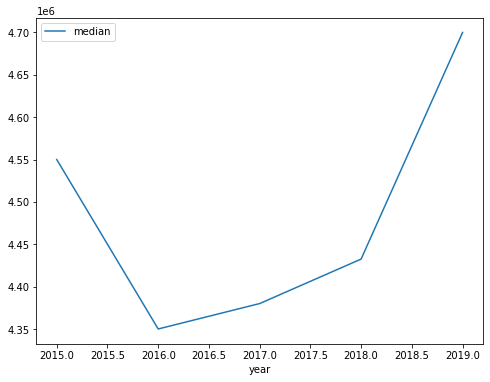

In [70]:
pivot_table_year = data.pivot_table(
    index = 'year', 
    values = 'last_price', 
    aggfunc = ['mean', 'count', 'median']) #используем колонку _id чтобы не выдавало ошибку
pivot_table_year.columns = ['mean', 'count', 'median']
print(pivot_table_year.sort_values('median', ascending = False))
pivot_table_year.plot(y = 'median', figsize=(8,6)) 
#UPD data['year'].corr(data['last_price'])

####   UPDНа данном графике видно, что c 2015 по 2018 году цены на квартиры были гораздо ниже, чем в 2014  и в 2019 годах(но тут важно отметить, что количество объявлений в 2014 крайне мало, всего 14, а в 2015 оно пусть и возросло в 28 раз, но все равно трудносопоставимо с последующими годами). 


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Рассчитывать корреляцию Пирсона для дня недели, месяца и года продажи не эффективно, так как цена в данном случае зависит от них не линейно. Чтобы изучить зависимость для этих параметров лучше построить bar plot или гистограмму рассчитав среднее значение или медиану. Графики у тебя уже есть, поэтому остаётся только удалить расчет корреляции)
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

#### Среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:

In [71]:
#Выберите 10 населённых пунктов с наибольшим числом объявлений. 
#Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
#Выделите населённые пункты с самой высокой и низкой стоимостью жилья.
largest_group=data.groupby('locality_name').count().sort_values('total_images', ascending=False)[:10].index

mean_price=[]
for name in largest_group:
    largest_group_parse=data[data['locality_name']==name]
    mean_data=largest_group_parse['price_per_meter'].mean()
    print("В населённом пункте '{}' средняя цена квадратного метра: {:.2f} руб".format(name, mean_data))
    mean_price.append(mean_data)
    
    

В населённом пункте 'Санкт-Петербург' средняя цена квадратного метра: 106194.10 руб
В населённом пункте 'поселок Мурино' средняя цена квадратного метра: 85350.67 руб
В населённом пункте 'поселок Шушары' средняя цена квадратного метра: 77471.52 руб
В населённом пункте 'Всеволожск' средняя цена квадратного метра: 66675.09 руб
В населённом пункте 'Колпино' средняя цена квадратного метра: 74671.95 руб
В населённом пункте 'поселок Парголово' средняя цена квадратного метра: 89479.84 руб
В населённом пункте 'Пушкин' средняя цена квадратного метра: 100350.97 руб
В населённом пункте 'деревня Кудрово' средняя цена квадратного метра: 92426.55 руб
В населённом пункте 'Гатчина' средняя цена квадратного метра: 68076.90 руб
В населённом пункте 'Выборг' средняя цена квадратного метра: 57011.26 руб


In [72]:
print("Город с максимальной стоимостью жилья: {}".format(largest_group[mean_price.index(max(mean_price))]))
print("Город с минимальной стоимостью жилья: {}".format(largest_group[mean_price.index(min(mean_price))]))

Город с максимальной стоимостью жилья: Санкт-Петербург
Город с минимальной стоимостью жилья: Выборг


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10, так будет более наглядно)
</div>

#### Определение средней цены каждого километра и выявление зависимости стоимости объектов  от расстояния до центра города:


<AxesSubplot:xlabel='cityCenters_distance', ylabel='mean_price_for_km'>

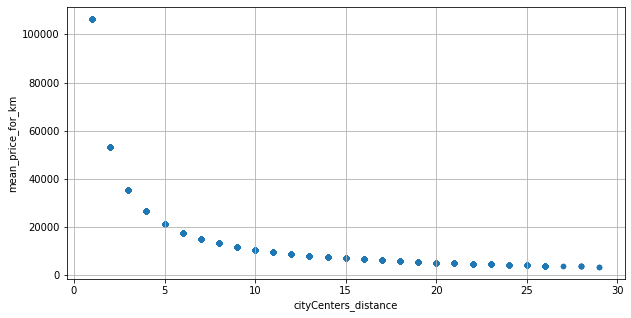

In [73]:
flat_saint_p = data.query('locality_name == "Санкт-Петербург"') #выбираем только квартиры в Санкт-Петербурге
flat_saint_p = flat_saint_p.dropna(subset = ['cityCenters_nearest'], inplace = False) #убираем  пропуски для дальнейшей работы
flat_saint_p['cityCenters_distance'] = flat_saint_p.loc[:, 'cityCenters_nearest'] / 1000 #добавляем столбец с км
flat_saint_p['cityCenters_distance'] = flat_saint_p['cityCenters_distance'].round() #округялем
flat_saint_p_mean_price_per_meter = flat_saint_p['price_per_meter'].mean() #средняя цена кв.м
flat_saint_p['mean_price_for_km'] = flat_saint_p_mean_price_per_meter / flat_saint_p['cityCenters_distance'] #средняя цена для каждого км
flat_saint_p.plot(x='cityCenters_distance', y='mean_price_for_km', kind='scatter', figsize=(10, 5), grid=True)

#### Расстояние до центра напрямую влияет на стоимость квартиры, чем ближе к центру тем дороже. При расстоянии до центра более 20 км   данная зависимость становится менее выражена. 

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>На каком километре заканчивается центр города на твой взгляд, судя по графику?
</div>

### Общий вывод

####  Исследование было посвящено объявлениям о продажах квартир.Работы:
Была получена первоначальная информация по датасету.

Обнаружены пропуски в датасете, кол-во некоторых доходит до 88.3%. Кол-во столбцов с пропусками 14 (всего в датасете 22 столбца).Явных дубликатов в датаесете не было обнаружено. Замечены аномалии, к примеру, минимальное значение потолков менее 2х метров метр, и более 10 метров.

Найдены пропуски, дубликаты и аномалии в датасете. Была проведена работа по заполнению пропусков, удаление ненужных строк из датасета, но пропуски в картографических данных не были подвергнуты обработке, во избежании искажений данных. Аномалии и дубликаты обработаны.

Заменены неявные дубликаты (раньше названия населенных пунктов повторялись из-за разной записи е-ё и так далее).Столбец с датой приведен к округленному до дней и правильному форматам. Пропуски в столбце с высотой потолков заменены на медиану. Убраны пропуски в столбце living area, они составляли ~8 процентов от датасета. Замена на булев тип данных в столбцах, где это необходимо. Пропуски в kitchen area исправлены на значение равное 18% от общей площади квартиры, что является медианным значением. Пропуски в living area исправлены на значение равное медианное значение от общей площади квартиры.
В датафрейм добавлены новые показатели:
цена одного квадратного метра;
день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
месяц публикации объявления;
год публикации объявления;
тип этажа квартиры (значения — «первый», «последний», «другой»);
расстояние до центра города в километрах (переведено из м в км).
Данные в целом распределены без аномалий

Время продаж в основном приходится на период после 2015 года. Среднее значение длительности размещения квартиры на площадке Яндекса равняется 122,6 дням, а медиана равна 95 дням. Выявлены выбивающиеся значения. Аномалии находятся на 45, 60, 7, 30 днях. Данные аномалии связаны с тем, что сроки публикации на яндексе соответсвуют этим дням.

Сделаны графики соотношений цены к другим показателям квартир

Корреляция цена- общая площадь = 0.751 
Чем больше площадь помещения, тем выше цена.
Корреляция цена- жилая площадь = 0.622 
Чем больше жилай площадь помещения, тем выше его цена.
Корелляция цена-площадь кухни = 0.523
Можно отметить наличие зависимости меду ценой и площадью кухни, но она еще меньше , по сравнению с общей площадью и жилой площадью
Корреляция цена-число компнат = 0.224
Нет прямой зависимости между показателем цены за квадратный метр и числом комнат в квартире. 
Корелляция цена-этаж = 0,111
С возрастанием этажа наблюдается рост цены, но незначительный дороже первых, но обычно не намного. Дорогими являются другие этажи. Исключение составляют 27 и 26 этажи, но количество таких кейсов мало, поэтому нельзя утверждать о наличии четкой зависимости.
Корреляция цена день недели  = -0.0009
Можно утверждать, что взаимосвязи между днем недели и ценой объекта нет, т.к. падение цены от пика во вторник к воскресенью совсем незначительно
Корреляция цена-месяц = 0.004
Зависимости между месяцами и ценой объекта также не выявлена, но можно утверждать, что в июне квартиры стоимость квартир находится на минимальной отметке(сезон отпусков)
Изучая зависимость между ценой и годом можно отметить, что c 2015 по 2018 году цены на квартиры были гораздо ниже, чем в 2014 и в 2019 годах(но тут важно отметить, что количество объявлений в 2014 крайне мало, всего 14, а в 2015 оно пусть и возросло в 28 раз, но все равно трудносопоставимо с последующими годами).
Среди 10 населенных  наибольшим числом объявлений:
В населённом пункте 'Санкт-Петербург' средняя цена квадратного метра: 114299.14 руб
В населённом пункте 'поселок Мурино' средняя цена квадратного метра: 85285.20 руб
В населённом пункте 'поселок Шушары' средняя цена квадратного метра: 78225.90 руб
В населённом пункте 'Всеволожск' средняя цена квадратного метра: 68651.95 руб
В населённом пункте 'Пушкин' средняя цена квадратного метра: 103068.29 руб
В населённом пункте 'Колпино' средняя цена квадратного метра: 75372.67 руб
В населённом пункте 'поселок Парголово' средняя цена квадратного метра: 90030.91 руб
В населённом пункте 'Гатчина' средняя цена квадратного метра: 68946.67 руб
В населённом пункте 'деревня Кудрово' средняя цена квадратного метра: 92426.55 руб
В населённом пункте 'Выборг' средняя цена квадратного метра: 58149.61 руб
Наибольшая цена квадртатного метра наблюдается в Санкт-Петербургбге, а наимешьшая в Выборге.
Расстояние до центра напрямую влияет на стоимость квартиры, чем ближе к центру тем дороже. Расстояние до центра напрямую влияет на стоимость квартиры, чем ближе к центру тем дороже. При расстоянии до центра более 20 км данная зависимость становится менее выражена

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудился, большая часть работы сделана, но остаётся внести следующие правки:
<br>- написать короткий вывод после первичного просмотра данных
<br>- не заполнять пропуски в столбце days_exposition
<br>- не заполнять пропуски в столбцах с картографическими данными
<br>- отбросить аномальные значения (площадь квартиры, стоимость, количество комнат)
<br>- не удалять пропуски в столбце с расстоянием до центра
<br>- изучить зависимость от общей цены, а не от цены за квадратный метр
<br>- удалить расчет корреляции для времени продажи
<br>- поправить выводы там, где это необходимо
</div>


<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v2:</b> 
<br>Остались две правки:
<br>- отбросить аномальные значения (площадь квартиры, стоимость, количество комнат)
<br>- поправить выводы там, где это необходимо
</div>


#### UPD2  аномалии значений площади кватир, общей стоимости и количества комнат обработаны, исправлены ячейки где ошибочно была указана цена за квадратный метр, а не общая цена. Выводы поправлены. UPD3 увеличен размах допустимых значений для площади квартиры и стоимости, а также уменьшен для количества комнат. Выводы изменены исходя из изменившихся значений.










<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v3:</b> 
<br>Остались две правки:
<br>- отбросить аномальные значения (площадь квартиры, стоимость, количество комнат)
<br>- поправить выводы там, где это необходимо
</div>


<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v4:</b>
<br>Все правки выполнены. Молодец!
<br>Проделана огромная работа! У тебя подробные, понятные и логичные выводы, которые ты подкрепляешь фактами. Были использованы разные графики и способы, чтобы как можно более тщательно изучить данные и у тебя это получилось! 
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [х]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [х]  определены пропущенные значения
- [х]  заполнены пропущенные значения там, где это возможно
- [х]  есть пояснение, какие пропущенные значения обнаружены
- [х]  изменены типы данных
- [х]  есть пояснение, в каких столбцах изменены типы и почему
- [х]  устранены неявные дубликаты в названиях населённых пунктов
- [х]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [х]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [х]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [х]  посчитано и добавлено в таблицу: месяц публикации объявления
- [х]  посчитано и добавлено в таблицу: год публикации объявления
- [х]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [х]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [х]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [х]  построены гистограммы для каждого параметра
- [х]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [х]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [х]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [х]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [х]  в каждом этапе есть промежуточные выводы
- [х]  есть общий вывод
